In [1]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
##para mas adelante
def capacidad_t(x):
  t_pico_horas = 4
  t_pico_minutos = 240
  C = 250
  x_ct = np.linspace(0, 25 , 1000)
  c_tl = []
  for i in range(len(x)):
    c_tl.append((dist_freq(x[i],lambda_f)*t_pico_horas*60)*C)
  c_t = np.array(c_tl)


In [31]:
###### Frecuencia
def dist_freq(x, lam):
  y = lam*math.exp(-lam*x)
  return y
#--------------------------
lambda_f = 0.4
x_f = np. linspace(0, 25 , 1000)
dist_f = []
for i in range(len(x_f)):
  dist_f.append(dist_freq(x_f[i],lambda_f))
y_f = np.array(dist_f)
####### Ocupacion
mu_o = 150
cov_o = 0.25
sigma_o = mu_o*cov_o
dist_o =  stats.norm(loc = mu_o, scale = sigma_o)
x_o = np.linspace(dist_o.ppf(0.0001),dist_o.ppf(0.9999),1000)
y_o = dist_o.pdf(x_o)
####### Demanda
mu_d = 5000
cov_d = 0.4
sigma_d = mu_d*cov_d
dist_d = stats.norm(loc = mu_d, scale = sigma_d)
x_d = np.linspace(dist_d.ppf(0.0001),dist_d.ppf(0.9999),1000)
y_d = dist_d.pdf(x_d)

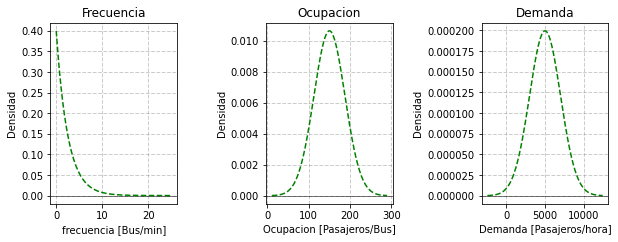

In [32]:
graph_names = ['Frecuencia','Ocupacion','Demanda']
xG_names = ['frecuencia [Bus/min]','Ocupacion [Pasajeros/Bus]','Demanda [Pasajeros/hora]']
xS = [x_f,x_o,x_d]
yS = [y_f,y_o,y_d]

fig1 = plt.figure("Distribuciones", figsize=(10,10/3))
fig1.subplots_adjust(hspace=0.7, wspace=0.7)
for i in range(1,len(xS)+1):
  ax = fig1.add_subplot(1, 3, i)
  ax.plot(xS[i-1],yS[i-1],"g--")
  ax.set_xlabel(xG_names[i-1])
  ax.set_ylabel("Densidad")
  ax.set_title(graph_names[i-1])
  ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
  ax.axhline(0, color='black', linewidth=0.5)

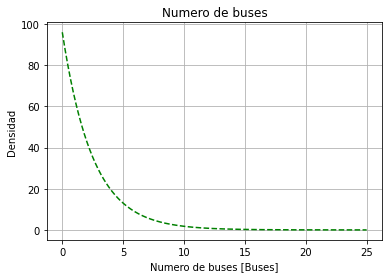

In [84]:
#Calculo de Capacidad C_t
t_pico_horas = 4
num_buses = y_f*t_pico_horas*60
plt.plot(x_f,num_buses,"g--")
plt.ylabel('Densidad')
plt.xlabel('Numero de buses [Buses]')
plt.title('Numero de buses')
plt.grid()

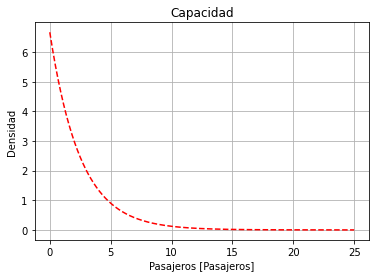

In [79]:
x_ct = np.linspace(0, 25 , 1000)
c_tl = []
C = 250 # pasajeros
for i in range(len(x_ct)):
  c_tl.append((dist_freq(x_ct[i],lambda_f)*t_pico_horas*60)*C)
c_t = np.array(c_tl)
plt.plot(x_ct,c_t,"r--")
plt.ylabel('Densidad')
plt.xlabel('Pasajeros [Pasajeros]')
plt.title('Capacidad')
plt.grid()

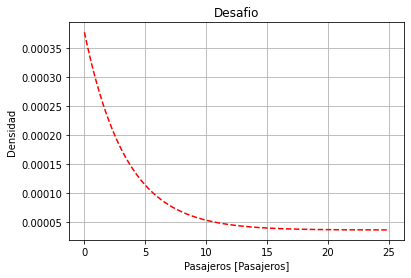

In [85]:
# Calculo de desafio D_t
x_dt = np.linspace(0, 25, 1000)
d_t = []
for i in range(len(x_dt)):
  d_t.append(((dist_freq(x_dt[i],lambda_f)*t_pico_horas*60)*dist_o.pdf(x_dt[i]))+dist_d.pdf(x_dt[i])*t_pico_horas)
D_t = np.array(d_t)
plt.plot(x_dt,D_t,"r--")
plt.ylabel('Densidad')
plt.xlabel('Pasajeros [Pasajeros]')
plt.title('Desafio')
plt.grid()

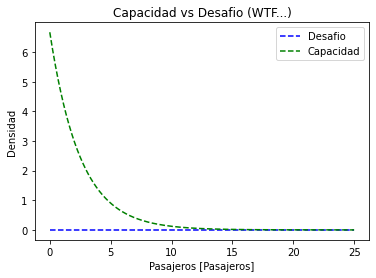

In [83]:
plt.plot(x_dt,D_t,"b--")
plt.ylabel('Densidad')
plt.xlabel('Pasajeros [Pasajeros]')
plt.title('Desafio')
plt.grid()
plt.plot(x_ct,c_t,"g--")
plt.ylabel('Densidad')
plt.xlabel('Pasajeros [Pasajeros]')
plt.title('Capacidad vs Desafio (WTF...)')
plt.legend(['Desafio','Capacidad'])
plt.grid()
plt.show()

In [83]:
import random
N = 10
a = 0
b = 25

nums_rand = []
for i in range(N):
  nums_rand.append(random.uniform(a,b))
  

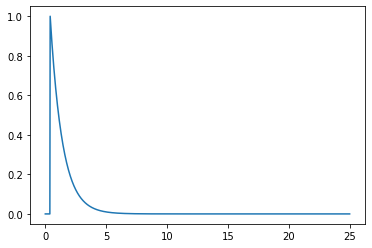

In [86]:
a = stats.expon(0.4)
plt.plot(x_f,a.pdf(x_f))